In [17]:
import pandas as pd
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv('train_v2.csv')

df.head()

/opt/anaconda3/envs/BigVision/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [3]:
df.columns

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778',
       'loss'],
      dtype='object', length=771)

In [4]:
df.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,...,105471.000000,105471.000000,105471.000000,105471.000000,104407.000000,103946.000000,105471.000000,105471.000000,105471.000000,105471.000000
mean,52736.000000,134.603171,8.246883,0.499066,2678.488874,7.354533,47993.704317,2974.336018,2436.363718,134.555225,...,17.422543,5.800976,-4.246788,3.273059,0.233852,0.014797,0.310246,0.322847,175.951589,0.799585
std,30446.999458,14.725467,1.691535,0.288752,1401.010943,5.151112,35677.136048,2546.551085,2262.950221,13.824682,...,18.548936,6.508555,4.828265,3.766746,0.073578,1.039439,0.462597,0.467567,298.294043,4.321120
min,1.000000,103.000000,1.000000,0.000006,1100.000000,1.000000,0.000000,1.000000,1.000000,106.820000,...,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,26368.500000,124.000000,8.000000,0.248950,1500.000000,4.000000,11255.000000,629.000000,746.000000,124.290000,...,5.000000,1.480000,-5.700000,0.740000,0.198400,-0.704275,0.000000,0.000000,19.000000,0.000000
50%,52736.000000,129.000000,9.000000,0.498267,2200.000000,4.000000,76530.000000,2292.000000,1786.000000,128.460000,...,11.000000,3.570000,-2.600000,1.990000,0.251800,0.375400,0.000000,0.000000,40.000000,0.000000
75%,79103.500000,148.000000,9.000000,0.749494,3700.000000,10.000000,80135.000000,4679.000000,3411.000000,149.080000,...,23.000000,7.700000,-1.010000,4.440000,0.283600,0.737100,1.000000,1.000000,104.000000,0.000000
max,105471.000000,176.000000,11.000000,0.999994,7900.000000,17.000000,88565.000000,9968.000000,11541.000000,172.950000,...,168.000000,58.120000,0.000000,34.040000,0.473700,11.092000,1.000000,1.000000,1212.000000,100.000000


In [5]:
import numpy as np

dtypes_df = pd.DataFrame(df.dtypes).reset_index()
dtypes_df[0].unique()

object_columns = dtypes_df[dtypes_df[0]=='O']['index'].tolist()

df[object_columns][object_columns[0]]

df_float64 = df.drop(object_columns, axis=1)

df_float64['loss']

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# enc = OneHotEncoder(handle_unknown='ignore')
# X = df[object_columns][object_columns[0]].astype(str).to_numpy().reshape(-1,1)
# X_transformed = enc.fit_transform(X)

# print(enc.categories_)
# label_encoder.fit(np.array(enc.categories_).reshape(-1,1))
# X = label_encoder.inverse_transform([np.argmax(X_transformed[0, :])])
# df[object_columns][object_columns[0]] = pd.Series(X.tolist())


#df[object_columns][object_columns[0]] = pd.Series(X_transformed.flatten())
#df[object_columns][object_columns[0]]


0         0
1         0
2         0
3         0
4         0
         ..
105466    0
105467    0
105468    0
105469    0
105470    0
Name: loss, Length: 105471, dtype: int64

In [6]:
import pandas as pd
from sklearn import preprocessing

COLUMNS = df_float64.columns
x = df_float64.to_numpy() #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_float64 = pd.DataFrame(x_scaled)

In [7]:
df_float64.columns = COLUMNS
df_float64.columns 

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778',
       'loss'],
      dtype='object', length=752)

<AxesSubplot:>

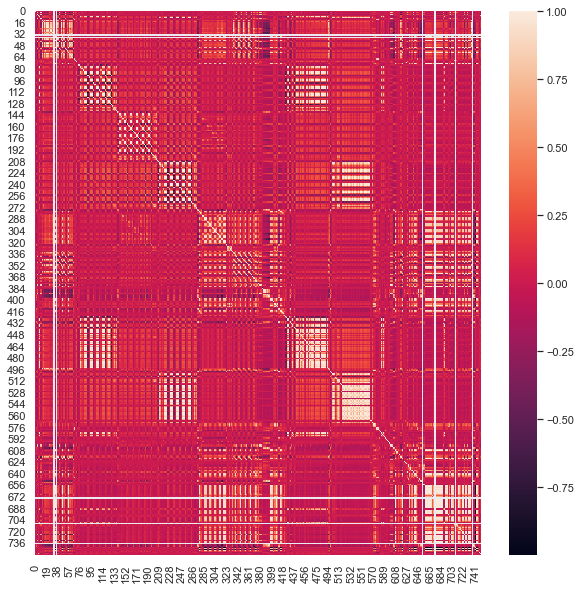

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
corr = df_float64.corr()
sns.heatmap(corr)

In [8]:
# Find features with correlation greater than 0.95

#print(corr)
#print(df_float64['target'])
#to_drop = [column for column in df_float64.columns if any(df_float64[column].abs() > 0.0 & df_float64[column].abs() < 0.4)]
#print(len(to_drop))
# Drop features 
#df_filtered = df_float64.drop(to_drop, axis=1)

#corr.columns = df_float64.columns
#print(corr.columns)
# if 'loss' in corr.columns:
#     print('output')
#columns_selected = corr[corr['loss'].abs() < 0.9]['loss'].reset_index()['index'].to_list()
#print(len(columns_selected))
#df_filtered = df_float64[columns_selected].fillna(0)
#df_float64['target']

df_float64['loss'] = df_float64['loss'].apply( lambda x: 1 if x>0 else 0)
df_filtered = df_float64

In [9]:
df_float64.columns

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778',
       'loss'],
      dtype='object', length=752)

In [10]:
df_filtered.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,0.000000,0.315068,0.9,0.686844,0.000000,0.1250,0.154677,0.722384,0.428769,0.301376,...,0.018072,0.036820,0.964319,0.034665,0.386954,0.651062,1.0,0.0,0.002479,0
1,0.000009,0.246575,0.9,0.782779,0.000000,0.1250,0.955739,0.023979,0.140728,0.252533,...,0.024096,0.009291,0.994439,0.003819,0.406586,0.601420,1.0,0.0,0.002479,0
2,0.000019,0.315068,0.9,0.500080,0.000000,0.1250,0.944019,0.180496,0.132236,0.316649,...,0.066265,0.049725,0.959917,0.030552,0.532193,0.648979,1.0,0.0,0.002479,0
3,0.000028,0.424658,0.9,0.439873,0.000000,0.1250,0.933123,0.756597,0.149827,0.394980,...,0.012048,0.022195,0.979379,0.019389,0.527338,0.648509,1.0,0.0,0.002479,0
4,0.000038,0.082192,0.8,0.502749,0.264706,0.1875,0.893400,0.008829,0.042461,0.240436,...,0.144578,0.105127,0.911492,0.073737,0.481739,0.606120,0.0,0.0,0.002479,0


In [11]:
from sklearn.model_selection import train_test_split

x = df_filtered.drop(columns=["loss"]).fillna(0).to_numpy()
y = df_filtered['loss'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=8)

# SVM 

In [11]:
#reading test Data
from sklearn import svm
svc = svm.SVC(probability=False)
svc = svc.fit(x_train,y_train)

In [12]:
pred = svc.predict(x_test)

[[31609     0]
 [ 3197     0]]


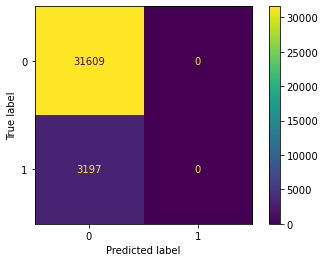

In [13]:

confusion = confusion_matrix(y_test, pred)
print(confusion)
plt.figure(figsize=(10,10))
plot_confusion_matrix(svc, x_test, y_test)

In [ ]:
with open("svc.model", "wb") as f:
    f.write(pickle.dumps(svc))

In [14]:
svc = pickle.load(open("svc_rohan1.model", 'rb'))
pred = svc.predict(x_test)
roc_auc_score(y_test, pred)

0.5

# KNN 

In [15]:
#knn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
pred = model.predict(x_test)
with open("knn.model", "wb") as f:
    f.write(pickle.dumps(model))

[[31278   348]
 [ 3133    47]]


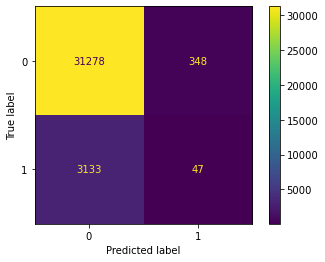

In [18]:
confusion = confusion_matrix(y_test, pred)
print(confusion)
plot_confusion_matrix(model, x_test, y_test)

In [20]:
roc_auc_score(y_test, pred)

0.5018881347923669

# Random Forest 

In [21]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# generate dataset

# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.583


[[31278   348]
 [ 3133    47]]


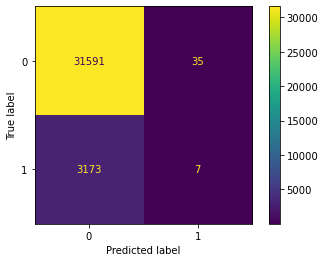

In [23]:
model.fit(x_train, y_train)
confusion = confusion_matrix(y_test, pred)
print(confusion)
plot_confusion_matrix(model, x_test, y_test)

# NN 

In [19]:
#neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

es = EarlyStopping(monitor='val_loss', mode='auto', min_delta=0.0001, patience=5)
def baseline_model():
    model = Sequential()
    model.add(Dense(x_train.shape[1], input_shape = (x_train.shape[1],), activation =relu))
    model.add(Dense(512, activation = relu))
    model.add(Dense(256, activation = relu))
    model.add(Dense(128, activation = relu))
    model.add(Dense(64, activation = relu))
    model.add(Dense(32, activation = relu))
    model.add(Dense(1, activation = 'sigmoid'))
    # Compile model
    opt = Adam(learning_rate = 0.01)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['ROC'])
    return model

#pickle.dumps(model, 'NeuralNetwork')

In [21]:
model = baseline_model()
model.fit(x_train, y_train, epochs=100, batch_size=500, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
142/142 [==============================] - 3s 20ms/step - loss: 0.0948 - accuracy: 0.9007 - val_loss: 0.0919 - val_accuracy: 0.9081
Epoch 2/100
142/142 [==============================] - 2s 17ms/step - loss: 0.0932 - accuracy: 0.9068 - val_loss: 0.0919 - val_accuracy: 0.9081
Epoch 3/100
142/142 [==============================] - 3s 18ms/step - loss: 0.0932 - accuracy: 0.9068 - val_loss: 0.0919 - val_accuracy: 0.9081
Epoch 4/100
142/142 [==============================] - 3s 19ms/step - loss: 0.0932 - accuracy: 0.9068 - val_loss: 0.0919 - val_accuracy: 0.9081
Epoch 5/100
142/142 [==============================] - 3s 19ms/step - loss: 0.0932 - accuracy: 0.9068 - val_loss: 0.0919 - val_accuracy: 0.9081
Epoch 6/100
142/142 [==============================] - 3s 19ms/step - loss: 0.0932 - accuracy: 0.9068 - val_loss: 0.0919 - val_accuracy: 0.9081


In [26]:
#Ensemble Stacked Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
models = dict()

models['lr'] = LogisticRegression()
models['knn'] = KNeighborsClassifier()
models['cart'] = DecisionTreeClassifier()
#models['svm'] = SVC()
models['bayes'] = GaussianNB()



#training of all the models
for name,model in models.items():
    model.fit(x_train,y_train)

/opt/anaconda3/envs/BigVision/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
y_test = y_test.reshape(-1,1)
np.shape(y_test)

(34806, 1)

In [42]:
# evaluate a given model using cross-validation
def evaluate_model(model, x_test, y_test):
    scores = model.score(x_test, y_test)
    return scores

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_test, y_test)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>lr 0.908 (0.000)
>knn 0.899 (0.000)
>cart 0.822 (0.000)
>bayes 0.593 (0.000)


In [43]:
from sklearn.ensemble import StackingClassifier

# define the base models
level0 = list()
level0.append(('lr', models['lr']))
level0.append(('knn', models['knn']))
level0.append(('cart', models['cart']))
#level0.append(('svm', models['svm']))
level0.append(('bayes', models['bayes']))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(x_train, y_train)

/opt/anaconda3/envs/BigVision/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/BigVision/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('bayes', GaussianNB())],
                   final_estimator=LogisticRegression())